In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./datasets/car_prices.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

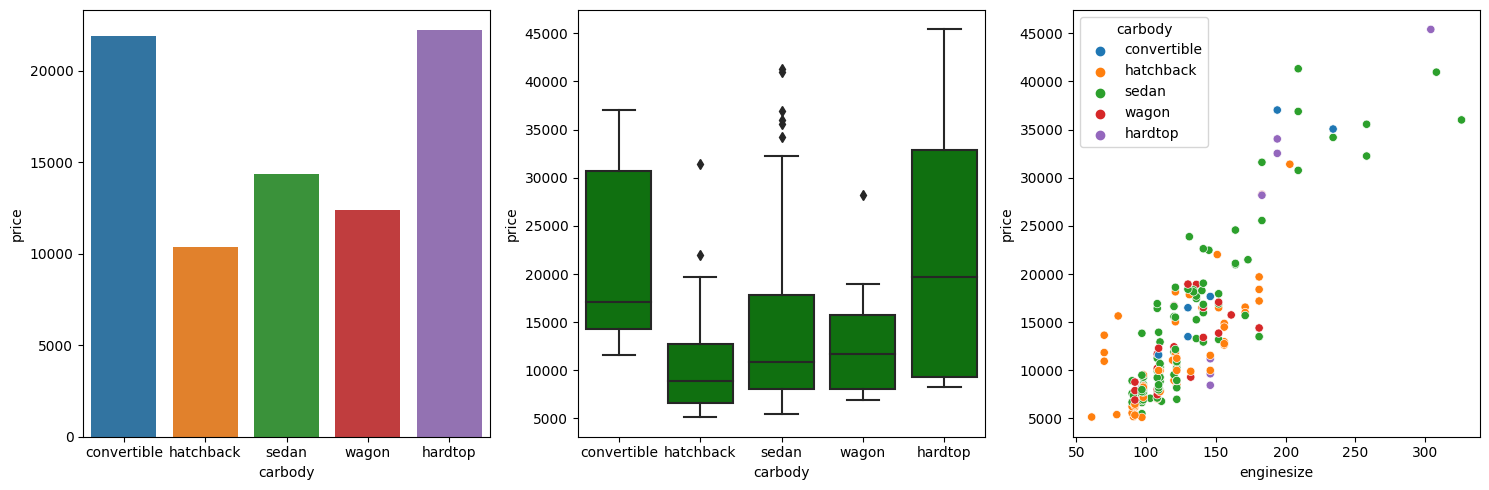

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='carbody', y='price', data=data, ci=False, ax=axs[0])
sns.boxplot(x='carbody', y='price', data=data, color='g', ax=axs[1])
sns.scatterplot(data = data, x='enginesize', y='price', hue='carbody', ax=axs[2])

plt.tight_layout()

## Matplotlib

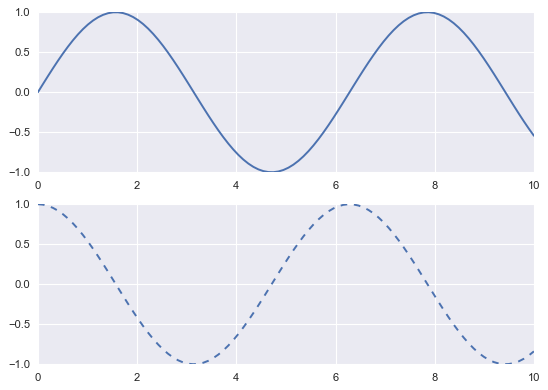

In [9]:
plt.style.use('seaborn')
x = np.linspace(0, 10, 100)

plt.figure()
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x), '-')
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), '--')

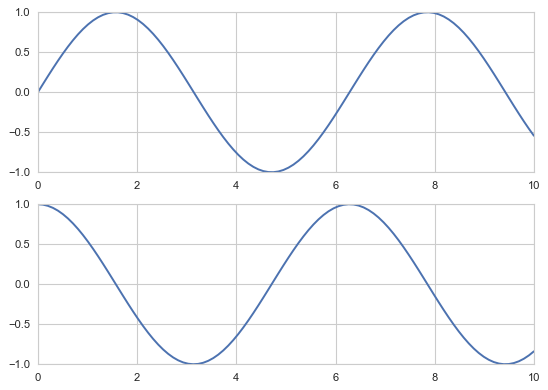

In [11]:
plt.style.use('seaborn-whitegrid')
# Es lo mismo hacer esto
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

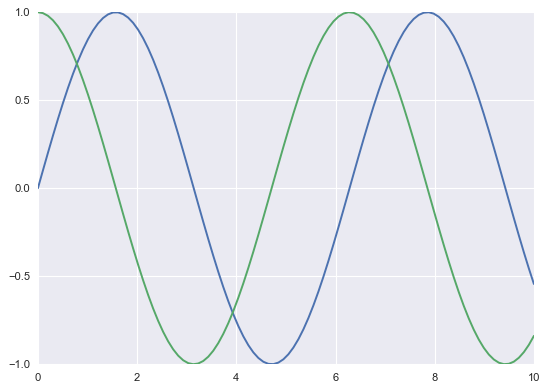

In [15]:
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Styling the plot

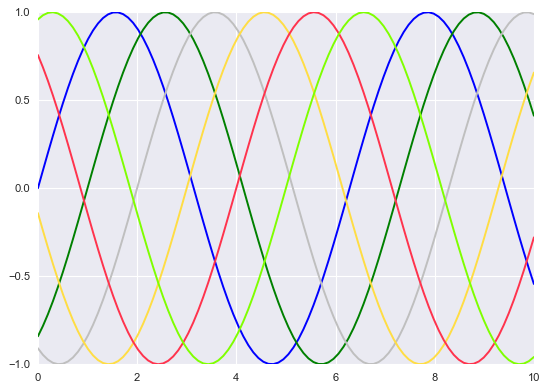

In [16]:
plt.plot(x, np.sin(x - 0), color='blue') # by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # grayscale 0-1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # hex code
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # rgb tuple
plt.plot(x, np.sin(x - 5), color='chartreuse') # html color name

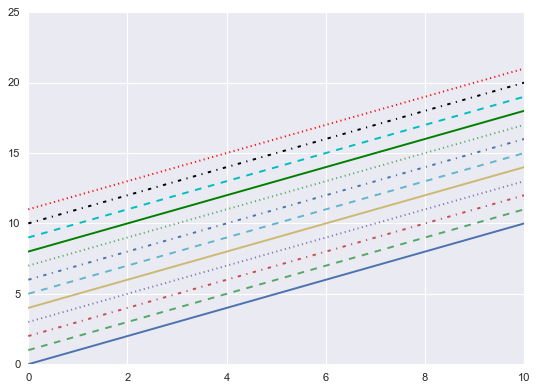

In [21]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':') # dotted

plt.plot(x, x + 8, '-g') # solid green
plt.plot(x, x + 9, '--c') # dashed cyan
plt.plot(x, x + 10, '-.k') # dashdot black
plt.plot(x, x + 11, ':r') # dotted red

(-1.0, 1.0)

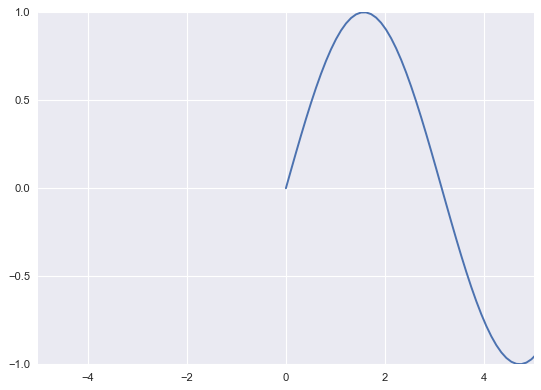

In [27]:
# Ajustar el plot
plt.plot(x, np.sin(x))

plt.xlim(-5, 5)
plt.ylim(-1, 1)

# plt.axis([-5, 5, -1, 1]) es lo mismo

(0.0, 10.0, -1.0, 1.0)

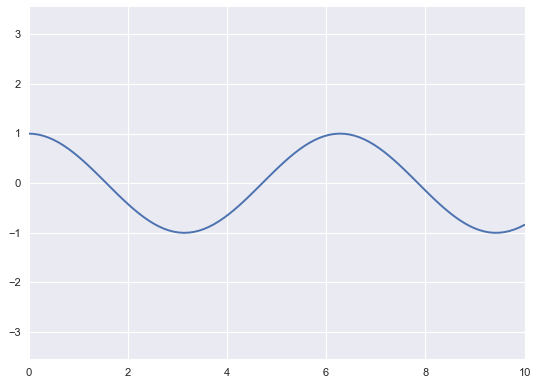

In [28]:
plt.plot(x, np.cos(x))
plt.axis('equal')

Text(0, 0.5, 'x values')

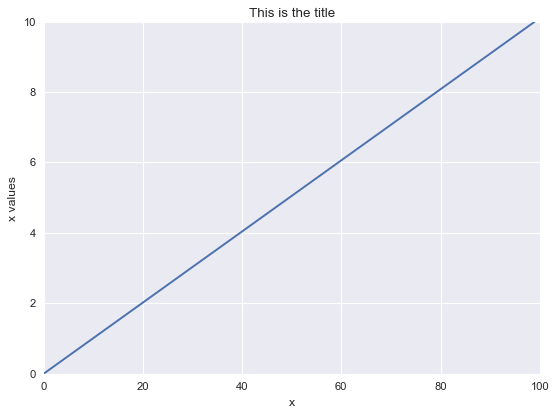

In [31]:
# Labeling

plt.plot(x)
plt.title('This is the title')
plt.xlabel('x')
plt.ylabel('x values')

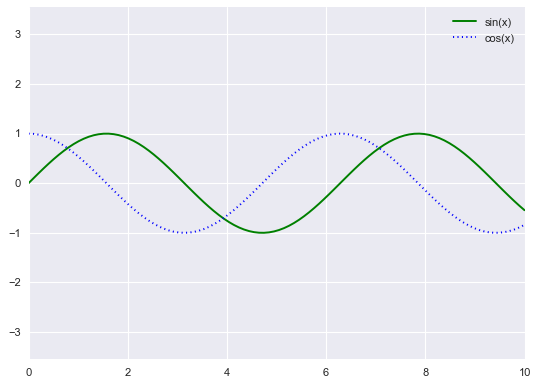

In [32]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A simple plot')]

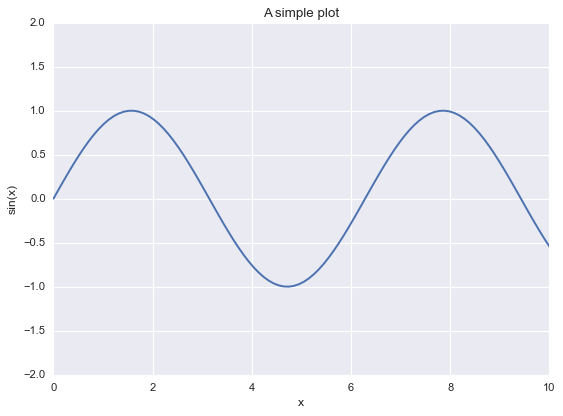

In [35]:
# plt.xlabel() -> ax.set_xlabel()
# plt.ylabel() -> ax.set_ylabel()
# plt.xlim() -> ax.set_xlim()
# plt.ylim() -> ax.set_ylim()
# plt.title() -> ax.set_title()

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title= 'A simple plot')

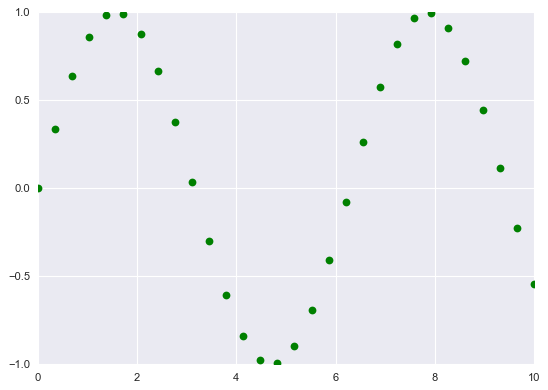

In [36]:
# Scatter plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='g')

(0.0, 1.0)

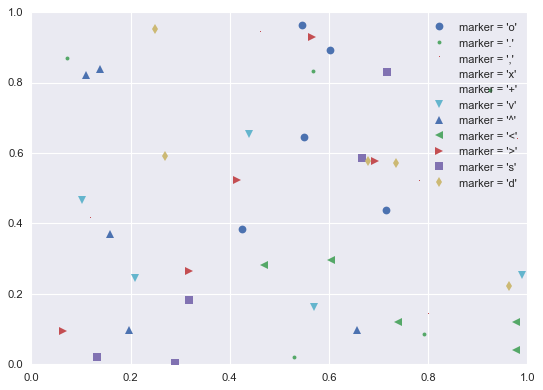

In [42]:
# Different markers type
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label=f"marker = '{marker}'")

plt.legend()
plt.xlim(0, 1)

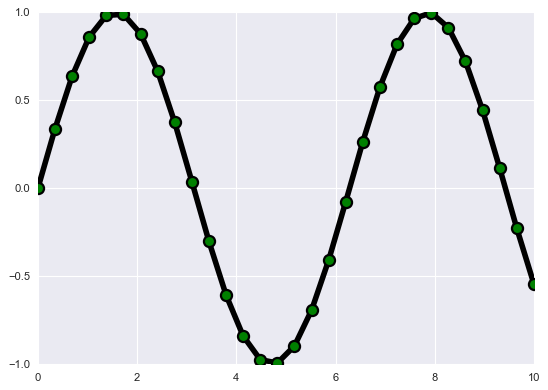

In [45]:
plt.plot(x, y, '-ok', # puedo combinarlos: line, circle marker, black
         markersize=10, linewidth=5,
         markerfacecolor='green',
         markeredgecolor='black',
         markeredgewidth=2) 

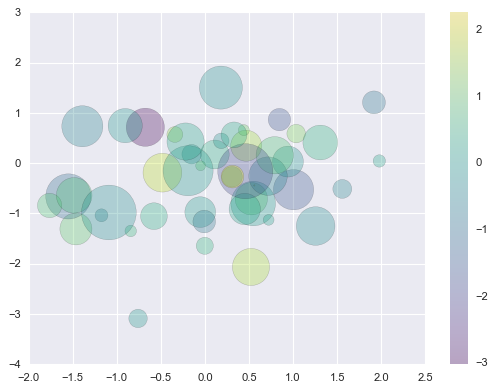

In [49]:
# plt.scatter()
rng = np.random.RandomState(19)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000 * rng.randn(100)

plt.scatter(x ,y, c=colors, s=sizes, alpha=.3, cmap='viridis')
plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

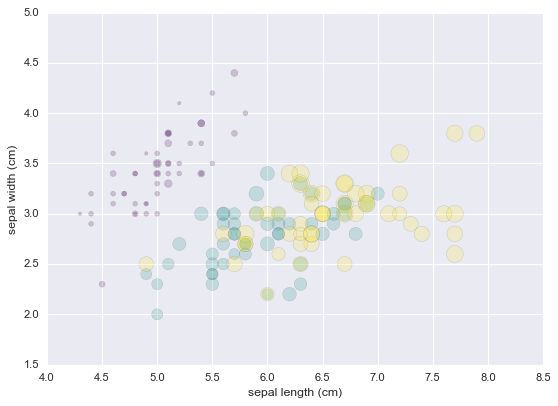

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

<ErrorbarContainer object of 3 artists>

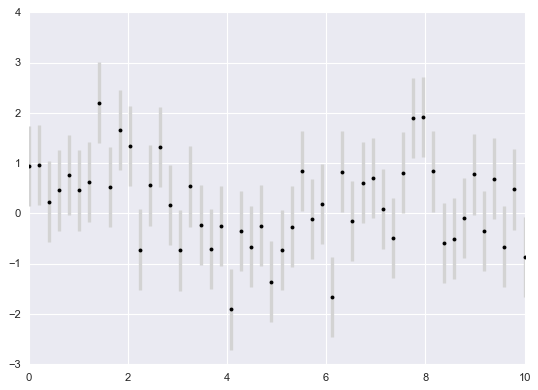

In [66]:
# Visualizar errores

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k',
            ecolor='lightgray', elinewidth=3, capsize=0)

(0.0, 10.0)

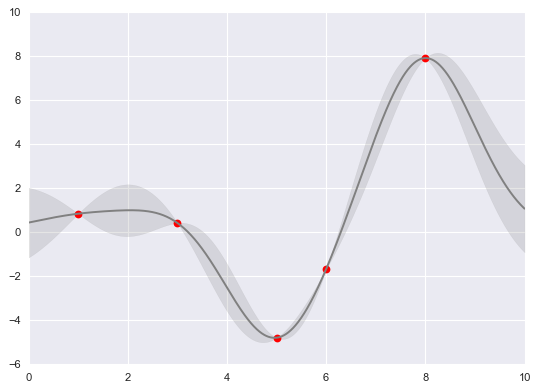

In [74]:
# Gaussian process regression (GPR)
from sklearn.gaussian_process import GaussianProcessRegressor
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * dyfit_ori

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=.2)
plt.xlim(0, 10)

Histograms, Binnings and Density

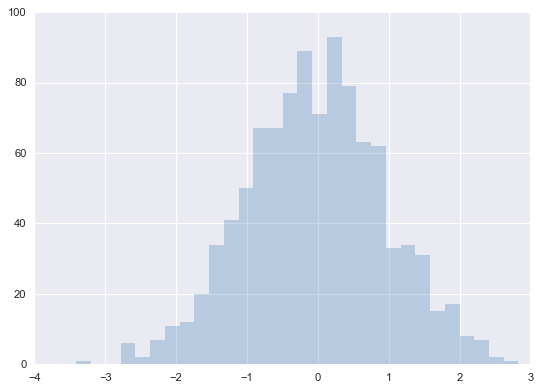

In [97]:
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=.3,
        histtype='stepfilled', color='steelblue',
        edgecolor='none')

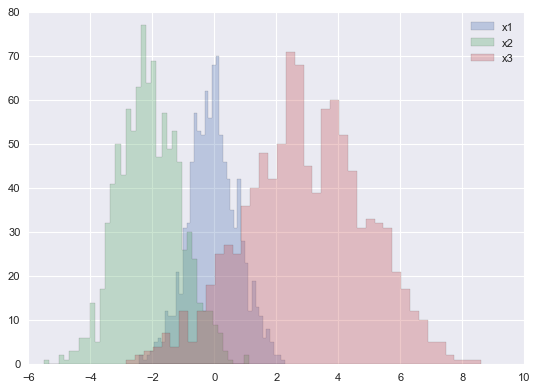

In [110]:
x1 = np.random.normal(0, 0.8, 1000) 
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=.3, bins=40)

plt.hist(x1, **kwargs, label='x1')
plt.hist(x2, **kwargs, label='x2')
plt.hist(x3, **kwargs, label='x3')
plt.legend()

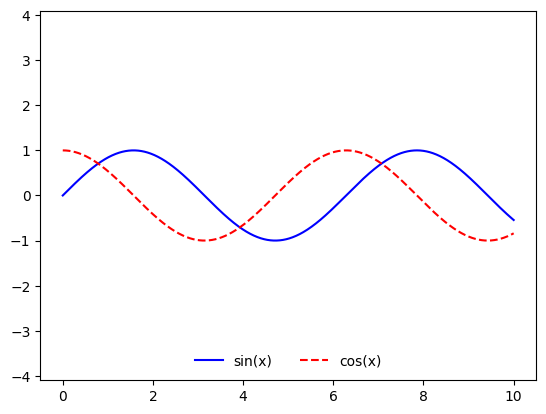

In [125]:
plt.style.use('default')
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='sin(x)')
ax.plot(x, np.cos(x), '--r', label='cos(x)')
ax.axis('equal')

ax.legend(loc='lower center', frameon=False, ncol=2)

In [132]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    RGB_weight = [.299, .587, .114]
    luminace = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminace[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                        subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

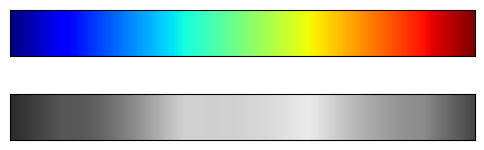

In [137]:
view_colormap('jet')